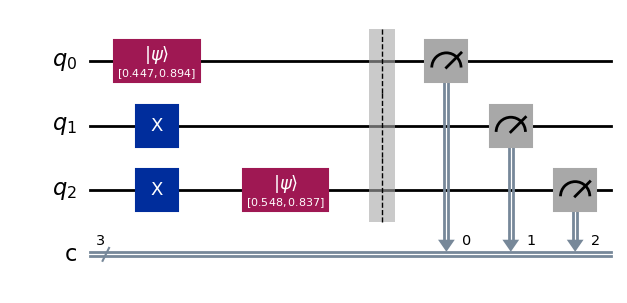

In [79]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
import numpy as np

# Create a Quantum Circuit acting on a quantum register of three qubits.
circ = QuantumCircuit(3, 3)
alpha0 = np.sqrt(0.2)
beta0 = np.sqrt(0.8)
circ.initialize([alpha0, beta0], 0)

circ.x(1)
circ.x(2)

alpha1 = np.sqrt(0.3)
beta1 = np.sqrt(0.7)
circ.initialize([alpha1, beta1], 2)

circ.barrier()
circ.measure([0, 1, 2], [0, 1, 2])

# Draw the circuit
circ.draw(style='iqp', output='mpl')


In [80]:
simulation = Aer.get_backend('statevector_simulator')
result = execute(circ, backend = simulation).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
             0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
             0.+0.0000000e+00j, 1.+2.4492936e-16j],
            dims=(2, 2, 2))


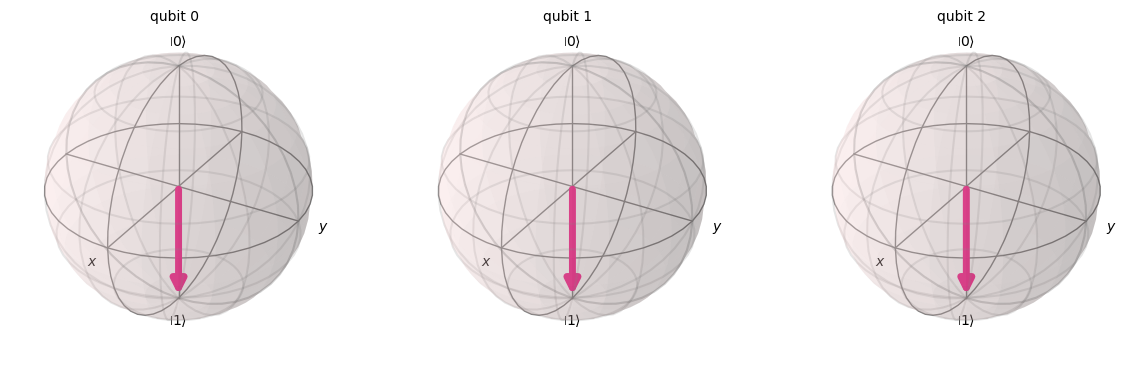

In [82]:
plot_bloch_multivector(statevector)

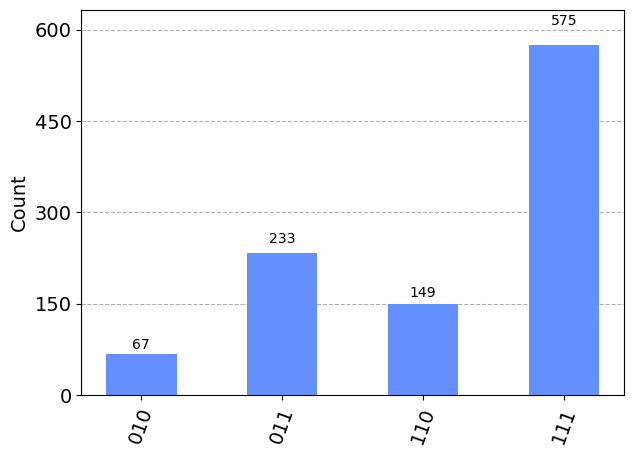

In [85]:
back = Aer.get_backend('qasm_simulator')
job = execute(circ, backend = back, shots=1024)
result = job.result()
counts = result.get_counts()
# from qiskit.tools.visualization import plot_histogram... (I did the import above)
plot_histogram(counts)